# Project #5: Wrangling Data -- "We Rate Dogs"

**Objective: The objective of this project is to gather data from the "We Rate Dogs" Twitter site, clean, analyze, and report out on any interesting insights discovered.**

In [1]:
#Import all necessary packages/libraries
#Tweepy Source: https://pypi.org/project/tweepy/#:~:text=Installation&text=You%20can%20also%20use%20Git,git%20cd%20tweepy%20pip%20install%20.&text=Python%202.7%2C%203.5%2C%203.6%2C,3.8%2C%20%26%203.9%20are%20supported.
#Formatting Jupyter Notebook
#Source: https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/

import pandas as pd
import numpy as np
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
import matplotlib as plt
import datetime as dt

# Gather Data

In [2]:
#Load the WeRateDogs Twitter archive data provided by Udacity. 
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#The tweet image predictions, i.e., what breed of dog (or other object, 
#animal, etc.) is present in each tweet according to a neural network. 
#This file (image_predictions.tsv) is hosted on Udacity's servers and 
#will be downloaded programmatically using the Requests library and 
#the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

image_url = ("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

response = requests.get(image_url)
with open(os.path.join(os.getcwd(), image_url.split('/')[-1]), mode = 'wb') as file:
        file.write(response.content)


In [4]:
#Read in image-prediction text file
image_prediction = pd.read_csv('image-predictions.tsv',sep='\t')

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file.
# These are hidden to comply with Twitter's API terms and conditions.
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [6]:
#tweet_ids = twitter_archive.tweet_id.values
#len(tweet_ids)

**Code provided by Udacity for students not able to obtain a developer account through twitter:**

Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0 fails_dict = {} start = timer()

Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile: 

This loop will likely take 20-30 minutes to run because of Twitter's rate limit for tweet_id in tweet_ids: 
count += 1 
print(str(count) + ": " + str(tweet_id)) try: 
tweet = api.get_status(tweet_id, tweet_mode='extended') 
print("Success") json.dump(tweet._json, outfile) outfile.write('\n') except tweepy.TweepError as e: 
print("Fail") fails_dict[tweet_id] = e pass end = timer() print(end - start) print(fails_dict)

In [7]:
#Source: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/twitter-data-in-python/
# Read tweets into dataframe 
tweets_list = []
# Use for loop to append each tweet into tweets_list
tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
 
        tweets_list.append(tweet)
    except:
        continue
        
tweet_file.close()


In [8]:
# Create dataframe to store tweets
tweets_df = pd.DataFrame()

# Update column names 
tweets_df['tweet_id'] = list(map(lambda tweet: tweet['id'], tweets_list))
tweets_df['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_list))
tweets_df['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_list))


In [9]:
tweets_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Access Data

In [10]:
#Display twitter_archive table 
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


twitter_archive has 2356 rows and 17 columns.

**Visual assessment:**
1. Several columns have many missing values: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
2. timestamp has "+0000" appended to the end of each datetime.
3. soucre includes html code and not just source.
4. name column includes many "None" values and "a" values.
5. Dog stages are mutiple columns and need to be merged into one. Appear to be many "None" values.
6. text gets cut off.


In [11]:
# Display image_prediction table
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


image_prediction has 2075 rows and 12 columns.

**Visual assessment:**
1. No missing data.
2. Some predictions are not dogs.
3. Some records include all "False" predictions suggesting that the images are not of dogs.

In [12]:
#Display tweets_df
tweets_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


tweets_df has 2354 rows and 3 columns.

**Visual assessment:**
1. No missing data.


In [13]:
#Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
#Expand columns so that text is legible to help perform visual assessment.
pd.set_option('display.max_colwidth', -1)

**Programmatic Assessments**

1. Check for missing values and incorrect datatypes
2. Look at descriptive stats

In [14]:
#Check for missing values/inaccurate datatypes
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
#Explore descriptive stats for twitter_archive.
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
#Look at range of rating_denominator since descriptive stats show a min of 0 and a max of 170.
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [17]:
#Look at record with rating_denominator of 0 to see if this makes sense.
twitter_archive[twitter_archive['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [18]:
#Look at record with rating_denominator of 170 to see if this makes sense.
twitter_archive[twitter_archive['rating_denominator'] == 170]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None


In [19]:
#Determine how many tweets are not original since we will ultimately only want to include original tweets in final dataset.
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id         77  
in_reply_to_user_id           31  
timestamp                     2356
source                        4   
text                          2356
retweeted_status_id           181 
retweeted_status_user_id      25  
retweeted_status_timestamp    181 
expanded_urls                 2218
rating_numerator              40  
rating_denominator            18  
name                          957 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
dtype: int64

In [20]:
#Determine how many times a dog appears in a post by name.
twitter_archive.name.value_counts()

None           745
a              55 
Charlie        12 
Lucy           11 
Cooper         11 
Oliver         11 
Lola           10 
Tucker         10 
Penny          10 
Bo             9  
Winston        9  
Sadie          8  
the            8  
Toby           7  
an             7  
Bailey         7  
Buddy          7  
Daisy          7  
Milo           6  
Leo            6  
Bella          6  
Stanley        6  
Oscar          6  
Jack           6  
Rusty          6  
Koda           6  
Scout          6  
Jax            6  
Dave           6  
Bentley        5  
              ..  
Mason          1  
Bilbo          1  
Shakespeare    1  
Jimbo          1  
Obie           1  
Bertson        1  
Jareld         1  
Coleman        1  
old            1  
Ron            1  
Charleson      1  
Anthony        1  
Napolean       1  
Willem         1  
Barclay        1  
Maya           1  
Bert           1  
Harnold        1  
Andru          1  
Venti          1  
Shikha         1  
Dale        

In [21]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


image_prediction has no missing values and data types look good.

In [22]:
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64

In [23]:
sum(image_prediction.duplicated())

0

There are no duplicate tweets in the image_prediction data. There are 2075 unique values (tweet_id).

In [24]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [25]:
tweets_df.nunique()

tweet_id          2354
retweet_count     1724
favorite_count    2007
dtype: int64

In [26]:
sum(tweets_df.duplicated())

0

tweets_df has no missing values and data types look good. There are no duplicate tweet_ids in the tweet_df data.

# Clean Data
**Define/Code/Test**

**TIDYNESS ISSUES:**
1. First I will address tidyness issues by merging the three dataframes into one dataframe with the image_prediction df being the base table since we only want to include posts with images for this analysis.
2. Second, I will merge the four dog stage columns (doggo, floofer, pupper, and puppo) into one dog_stage column to comply with the rules of tidyness in which each variable forms a column and each observation forms a row.

**Tidyness Issue #1. First I will address tidyness issues by merging the three dataframes into one dataframe with the image_prediction df being the base table since we only want to include posts with pictures for this analysis.**

**Define: Merge image_prediction with twitter_archive and tweets_df.**

**Code**

In [27]:
twitter_image = image_prediction.merge(twitter_archive, left_on='tweet_id', right_on='tweet_id', how='left')

**Test**

In [28]:
#Confirm tables merged correctly.
twitter_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None


In [29]:
twitter_image.shape

(2075, 28)

**Code**

In [30]:
twitter_image_tweets = twitter_image.merge(tweets_df, left_on='tweet_id', right_on='tweet_id', how='left')

**Test**

In [31]:
twitter_image_tweets.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None,532.0,2535.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None,48.0,132.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None,47.0,128.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,147.0,311.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,41.0,111.0


In [32]:
#Confirm number of rows/columns after merger.
twitter_image_tweets.shape

(2075, 30)

In [33]:
#Copy merged data file prior to cleaning/manipulating.
tw_image_clean = twitter_image_tweets.copy()


**Quality Issue #1**

**Define: Remove +0000 from timestamp**

**Code**

In [34]:
tw_image_clean.timestamp  = tw_image_clean.timestamp.str.strip('+0000')

**Test**

In [35]:
tw_image_clean[0:30]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None,532.0,2535.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None,48.0,132.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None,47.0,128.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,147.0,311.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,41.0,111.0
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None,60.0,136.0
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None,879.0,1253.0
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None,261.0,448.0
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None,146.0,304.0
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None,61.0,115.0


**Quality Issue #2**

**Define: Convert timestamp datatype to date from str.**

**Code**

In [36]:
#Source: https://stackabuse.com/converting-strings-to-datetime-in-python/
#Source: https://stackoverflow.com/questions/466345/converting-string-into-datetime

tw_image_clean['timestamp'] = pd.to_datetime(tw_image_clean['timestamp'])

**Test**

In [37]:
tw_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        2075 non-null bool
p2                            2075 non-null object
p2_conf                       2075 non-null float64
p2_dog                        2075 non-null bool
p3                            2075 non-null object
p3_conf                       2075 non-null float64
p3_dog                        2075 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id      

**Quality Issue #3**

**Define: Set all rating denominators to 10 to be consistent for comparison and analysis.**

**Code**

In [38]:
tw_image_clean['rating_denominator'] = 10

**Test**

In [39]:
tw_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None,532.0,2535.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None,48.0,132.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None,47.0,128.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,147.0,311.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,41.0,111.0


**Quality Issue #4**

**Define: Filter out retweets.**

**Code**

In [40]:
tw_image_clean = tw_image_clean.query('retweeted_status_id == "NaN"')

**Test**

In [41]:
tw_image_clean.nunique()

tweet_id                      1994
jpg_url                       1994
img_num                       4   
p1                            374 
p1_conf                       1991
p1_dog                        2   
p2                            401 
p2_conf                       1989
p2_dog                        2   
p3                            405 
p3_conf                       1991
p3_dog                        2   
in_reply_to_status_id         22  
in_reply_to_user_id           1   
timestamp                     1994
source                        3   
text                          1994
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    0   
expanded_urls                 1994
rating_numerator              34  
rating_denominator            1   
name                          936 
doggo                         2   
floofer                       2   
pupper                        2   
puppo                         2   
retweet_count       

**Quality Issue #5**

**Define: Drop unnecessary columns.**

**Code**

In [42]:
tw_image_clean.drop('retweeted_status_id', axis = 1, inplace = True)
tw_image_clean.drop('retweeted_status_user_id', axis = 1, inplace = True)
tw_image_clean.drop('retweeted_status_timestamp', axis = 1, inplace = True)
tw_image_clean.drop('in_reply_to_status_id', axis = 1, inplace = True)
tw_image_clean.drop('in_reply_to_user_id', axis = 1, inplace = True)

**Test**

In [43]:
tw_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None,532.0,2535.0
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None,48.0,132.0
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None,47.0,128.0
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,147.0,311.0
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,41.0,111.0


In [44]:
tw_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 25 columns):
tweet_id              1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-n

**TIDYNESS Issue #2. Second, I will merge the four dog stage columns (doggo, floofer, pupper, and puppo) into one dog_stage column to comply with the rules of tidyness in which each variable forms a column and each observation forms a row.**

**Define: Address tidyness issue of having a column for each dog stage rather than one column with dog stage.**

**Code**

In [45]:
tw_image_clean.replace('None', np.nan, inplace=True)
tw_image_clean['dog_stage'] = tw_image_clean[['doggo', 'floofer', 'pupper', 'puppo']].fillna('').sum(axis=1).astype(str)

In [46]:
tw_image_clean = tw_image_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**Test**

In [47]:
tw_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1448 non-null object
retweet_count         1994 non-null float64
favorite_count        1994 non-

In [48]:
tw_image_clean.groupby('dog_stage').tweet_id.nunique()

dog_stage
                1688
doggo           63  
doggofloofer    1   
doggopupper     9   
doggopuppo      1   
floofer         7   
pupper          203 
puppo           22  
Name: tweet_id, dtype: int64

**Quality Issue #6**

**Define: Explore/fix dog_stage data to fix redundancies**

**Code**

In [49]:
tw_image_clean[tw_image_clean['dog_stage'] == "doggofloofer"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1913,854010172552949760,https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg,1,English_springer,0.354733,True,collie,0.177538,True,Border_collie,...,2017-04-17 16:34:26,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,NaN,3433.0,17169.0,doggofloofer


Text states that this is a rare owl and not a dog at all. Dropping record -- tweet_id = 854010172552949760

In [50]:
#Source: https://chrisalbon.com/python/data_wrangling/pandas_dropping_column_and_rows/
#Source: https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value

tw_image_clean.drop(tw_image_clean.loc[tw_image_clean['tweet_id'] == 854010172552949760].index, inplace=True)

**Test**

In [51]:
tw_image_clean[tw_image_clean['tweet_id'] == 854010172552949760]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage


In [52]:
tw_image_clean[tw_image_clean['dog_stage'] == "doggopuppo"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,...,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,19196.0,47844.0,doggopuppo


Text states this is a puppo so I will update the dog_stage to align with the text.

**Code**

In [53]:
#Update tweet_id 855851453814013952
tw_image_clean.loc[tw_image_clean['dog_stage'] == 'doggopuppo','dog_stage']  = 'puppo'

**Test**

In [54]:
tw_image_clean[tw_image_clean['tweet_id'] == 855851453814013952]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,...,2017-04-22 18:31:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,NaN,19196.0,47844.0,puppo


In [55]:
tw_image_clean[tw_image_clean['dog_stage'] == "doggopupper"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1155,733109485275860992,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,...,2016-05-19 01:38:16,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,NaN,17621.0,44619.0,doggopupper
1201,741067306818797568,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,...,2016-06-10 00:39:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,just,3520.0,10342.0,doggopupper
1292,751583847268179968,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,...,2016-07-09 01:08:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,NaN,1265.0,4849.0,doggopupper
1350,759793422261743616,https://pbs.twimg.com/media/CotUFZEWcAA2Pku.jpg,2,golden_retriever,0.985876,True,Labrador_retriever,0.001948,True,kuvasz,...,2016-07-31 16:50:42,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,2173.0,6620.0,doggopupper
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,...,2016-10-11 00:34:48,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,2561.0,8735.0,doggopupper
1609,801115127852503040,https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg,1,dalmatian,0.823356,True,English_setter,0.094602,True,bluetick,...,2016-11-22 17:28:25,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,2429.0,8992.0,doggopupper
1616,802265048156610565,https://pbs.twimg.com/media/CyI3zXgWEAACQfB.jpg,1,Labrador_retriever,0.897162,True,beagle,0.016895,True,Rhodesian_ridgeback,...,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,NaN,1573.0,7039.0,doggopupper
1644,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,1,golden_retriever,0.426183,True,Labrador_retriever,0.257447,True,Great_Pyrenees,...,2016-12-12 00:29:28,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pup

**Code**

In [56]:
#Drop tweet_id (751583847268179968) as does not appear to be a dog pic
tw_image_clean.drop(tw_image_clean.loc[tw_image_clean['tweet_id'] == 751583847268179968].index, inplace=True)

**Test**

In [57]:
tw_image_clean[tw_image_clean['tweet_id'] == 751583847268179968]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage


In [58]:
tw_image_clean.groupby('dog_stage').tweet_id.nunique()

dog_stage
               1688
doggo          63  
doggopupper    8   
floofer        7   
pupper         203 
puppo          23  
Name: tweet_id, dtype: int64

**Quality Issue #7**

**Define: Update dog names from None to Nan.**

**Code**

In [59]:
tw_image_clean.dog_stage = tw_image_clean['dog_stage'].replace('None', np.NaN)

**Test**

In [60]:
tw_image_clean.name.value_counts()

a              55
Charlie        11
Oliver         10
Cooper         10
Lucy           10
Tucker         9 
Penny          9 
Winston        8 
Sadie          8 
the            7 
Daisy          7 
Toby           7 
Lola           7 
an             6 
Bo             6 
Bella          6 
Koda           6 
Jax            6 
Stanley        6 
Rusty          5 
Chester        5 
Milo           5 
Bailey         5 
Oscar          5 
Scout          5 
Louis          5 
Buddy          5 
Leo            5 
Dave           5 
Alfie          4 
              .. 
Shakespeare    1 
Obie           1 
Anakin         1 
Mitch          1 
Tater          1 
Gin            1 
Bertson        1 
Coleman        1 
Shaggy         1 
Ron            1 
Charleson      1 
Anthony        1 
Napolean       1 
Willem         1 
Barclay        1 
Florence       1 
Maya           1 
Jonah          1 
Ike            1 
Venti          1 
Andru          1 
Dale           1 
Clybe          1 
Liam           1 
Noosh     

In [61]:
tw_image_clean[tw_image_clean['name'] == "a"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,48.0,132.0,
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,47.0,128.0,
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,147.0,311.0,
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,60.0,136.0,
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,261.0,448.0,
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,146.0,304.0,
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,...,2015-11-16 16:37:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3,10,a,368.0,522.0,
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,...,2015-11-17 00:06:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,https://twitter.com/dog_rates/status/666407126856765440/photo/1,

**Quality Issue #8**

**Define: Drop all records where text includes "We only rate dogs.", "I only rate dogs."**

**Code**

In [62]:
#Source: https://www.xspdf.com/help/50818407.html
#df[~df.C.str.contains("XYZ")]

searchfor = ['We only rate dogs.', 'I only rate dogs.']
tw_image_clean = tw_image_clean[~tw_image_clean.text.str.contains('|'.join(searchfor))]

**Test**

In [63]:
tw_image_clean[tw_image_clean['name'] == "a"]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,48.0,132.0,
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,47.0,128.0,
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,147.0,311.0,
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,2015-11-16 00:30:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,60.0,136.0,
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,2015-11-16 00:49:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,261.0,448.0,
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,2015-11-16 00:55:59,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,146.0,304.0,
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,...,2015-11-16 16:37:02,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,https://twitter.com/dog_rates/status/666293911632134144/photo/1,3,10,a,368.0,522.0,
28,666407126856765440,https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg,1,black-and-tan_coonhound,0.529139,True,bloodhound,0.244220,True,flat-coated_retriever,...,2015-11-17 00:06:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,https://twitter.com/dog_rates/status/666407126856765440/photo/1,

**Quality Issue #9**

**Define: Clean source column to isolate source and remove html.**

**Code**

In [64]:
tw_image_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1904
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [65]:
#Source: https://www.tutorialspoint.com/python/python_functions.htm
#Source: https://stackoverflow.com/questions/9662346/python-code-to-remove-html-tags-from-a-string

source_dict = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
'<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine - Make a Scene',
'<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' :'Twitter Web Client',
'<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}

def clean_source(tw_image_clean):
    if tw_image_clean['source'] in source_dict.keys():
        source_col = source_dict[tw_image_clean['source']]
        return source_col
    else:
        return tw_image_clean['source']
    
tw_image_clean['source'] = tw_image_clean.apply(clean_source, axis=1)

**Test**

In [66]:
tw_image_clean.source.value_counts()

Twitter for iPhone    1904
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

# Store Data


In [67]:
tw_image_clean.to_excel(r"twitter_archive_master.xlsx", sheet_name='twitter_image_clean',header=True, merge_cells=False, index=False)


# Analyze/Visualize Data

Analyze and visualize your wrangled data in your wrangle_act.ipynb Jupyter Notebook. At least three (3) insights and one (1) visualization must be produced.

In [68]:
#Load the clean twitter_archive_master data file. 
df = pd.read_excel(r'twitter_archive_master.xlsx')

In [69]:
df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage
0,666020888022790144,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,2015-11-15 22:32:08,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,532,2535,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,2015-11-15 23:05:30,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,48,132,NaN
2,666033412701032448,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,2015-11-15 23:21:54,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,47,128,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,2015-11-16 00:04:52,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,147,311,NaN
4,666049248165822464,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,2015-11-16 00:24:50,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,41,111,NaN


In [70]:
df.shape

(1943, 22)

In [71]:
df['year'] = df['timestamp'].dt.year
df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,year
0,666020888022790144,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,NaN,532,2535,NaN,2015
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,48,132,NaN,2015
2,666033412701032448,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,47,128,NaN,2015
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,147,311,NaN,2015
4,666049248165822464,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,NaN,41,111,NaN,2015
5,666050758794694656,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,Twitter for iPhone,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,60,136,NaN,2015
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,879,1253,NaN,2015
7,666055525042405376,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,Twitter for iPhone,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,261,448,NaN,2015
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,Twitter for iPhone,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,146,304,NaN,2015
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twi

In [72]:
source = df.groupby(['source','year']).tweet_id.count()
source

source              year
TweetDeck           2015    4  
                    2016    7  
Twitter Web Client  2015    20 
                    2016    5  
                    2017    3  
Twitter for iPhone  2015    632
                    2016    934
                    2017    338
Name: tweet_id, dtype: int64

In [73]:
source_pcnt = (df.groupby(['source','year']).tweet_id.count()/df.shape[0]) * 100
source_pcnt

source              year
TweetDeck           2015    0.205867 
                    2016    0.360268 
Twitter Web Client  2015    1.029336 
                    2016    0.257334 
                    2017    0.154400 
Twitter for iPhone  2015    32.527020
                    2016    48.069995
                    2017    17.395780
Name: tweet_id, dtype: float64

In [74]:
#Source: https://python-graph-gallery.com/11-grouped-barplot/

#import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = [0.21, 0.36, 0.0]
bars2 = [1.03, 0.26, 0.15]
bars3 = [32.53, 48.07, 17.40]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

 
# Make the plot
plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='% TweetDeck')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='% Twitter Web Client')
plt.bar(r3, bars3, color='g', width=barWidth, edgecolor='white', label='% Twitter for iPhone')

 
# Add xticks on the middle of the group bars
plt.xlabel('Year/Source', fontweight='bold')
plt.ylabel('Percent', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2015', '2016', '2017'])
plt.title('Percent of Tweets by Source & Year', fontweight='bold') 
    
# Create legend & Show graphic
plt.legend()
plt.show()


**INSIGHT #1:** The majority of users posted to "We Rate Dogs" via Twitter for iPhone across all three years. While a small percentage of users also posted via TweetDeck and Twitter Web Client in 2015 and 2016, by 2017, the percentage of tweets from these platforms from practically non-existent.

In [75]:
df.shape[0]

1943

In [76]:
df.groupby(['dog_stage']).tweet_id.count()

dog_stage
doggo          63 
doggopupper    8  
floofer        7  
pupper         203
puppo          23 
Name: tweet_id, dtype: int64

In [77]:
dog_stage_pcnt = (df.groupby(['dog_stage']).tweet_id.count()/df.shape[0]) * 100
dog_stage_pcnt

dog_stage
doggo          3.242409 
doggopupper    0.411734 
floofer        0.360268 
pupper         10.447761
puppo          1.183736 
Name: tweet_id, dtype: float64

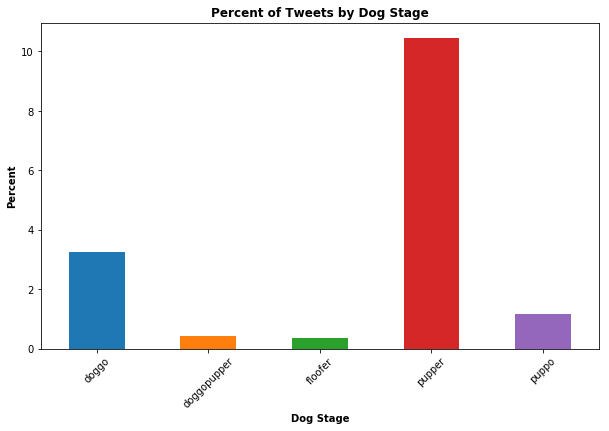

In [78]:
#Source: https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib

#Fig size
plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2

((df.groupby(['dog_stage']).tweet_id.count()/df.shape[0]) * 100).plot(kind='bar')

# Add xticks on the middle of the group bars
plt.xlabel('Dog Stage', fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Percent', fontweight='bold')
plt.title('Percent of Tweets by Dog Stage', fontweight='bold') 

# Create legend & Show graphic
plt.show()

**INSIGHT #2:** The most frequently tweeted dog images on "We Rate Dogs" were those in the "pupper" stage, however, it should be noted that we did not have data for the vast majority, or 84%, of these images.

In [79]:
p1_pop = df.groupby('p1').tweet_id.count().nlargest(10)
p1_pop

p1
golden_retriever      137
Labrador_retriever    90 
Pembroke              85 
Chihuahua             78 
pug                   51 
Pomeranian            38 
toy_poodle            38 
Samoyed               37 
chow                  37 
malamute              29 
Name: tweet_id, dtype: int64

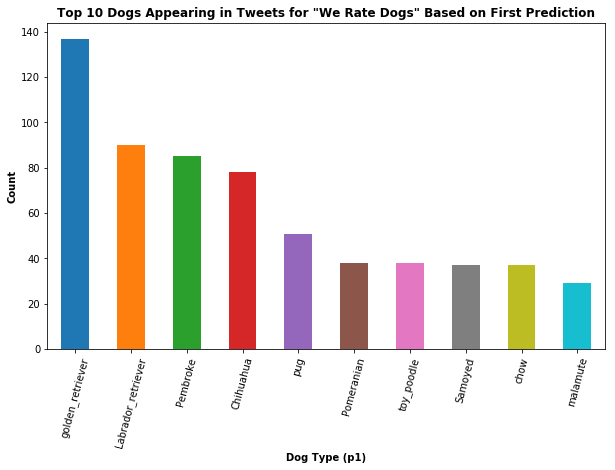

In [80]:
#Fig size
plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2

df.groupby('p1').tweet_id.count().nlargest(10).plot(kind='bar')

# Add xticks on the middle of the group bars
plt.xlabel('Dog Type (p1)', fontweight='bold')
plt.xticks(rotation=75)
plt.ylabel('Count', fontweight='bold')
plt.title('Top 10 Dogs Appearing in Tweets for "We Rate Dogs" Based on First Prediction', fontweight='bold') 

# Create legend & Show graphic
plt.show()

**INSIGHT #3:** The top 10 dogs appearing in tweets on "We Rate Dogs" based on the neural networks first prediction rating were: Golden Retrievers, Labrador Retrievers, Pembrokes, Chihuahuas, Pugs, Pomeranians, Toy Poodles, Samoyed, Chows, and Malamutes in that order.

In [81]:
fav = df.groupby('p1').favorite_count.sum().nlargest(10)
fav

p1
golden_retriever      1668261
Labrador_retriever    1020595
Pembroke              960900 
Chihuahua             644051 
French_bulldog        447417 
Samoyed               439678 
pug                   311540 
chow                  301552 
cocker_spaniel        299498 
Pomeranian            299114 
Name: favorite_count, dtype: int64

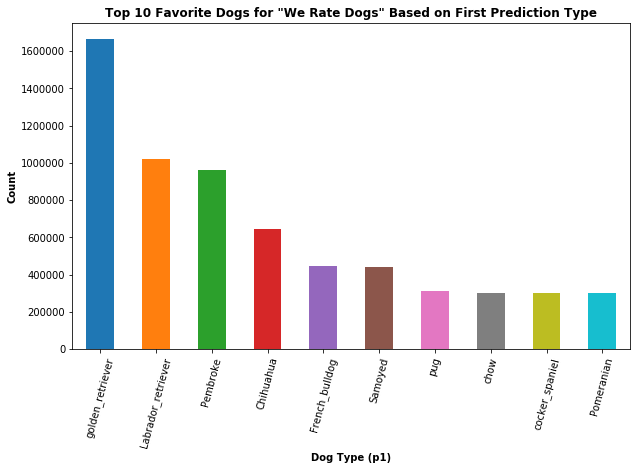

In [82]:
#Fig size
plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2

df.groupby('p1').favorite_count.sum().nlargest(10).plot(kind='bar')

# Add xticks on the middle of the group bars
plt.xlabel('Dog Type (p1)', fontweight='bold')
plt.xticks(rotation=75)
plt.ylabel('Count', fontweight='bold')
plt.title('Top 10 Favorite Dogs for "We Rate Dogs" Based on First Prediction Type', fontweight='bold') 

# Create legend & Show graphic
plt.show()

**INSIGHT #4:** Golden Retrievers are by far the most favorited dogs on "We Rate Dogs," followed by Labrador Retrievers and Pembrokes.

In [83]:
retweet = df.groupby('p1').retweet_count.sum().nlargest(10)
retweet

p1
golden_retriever      494931
Labrador_retriever    325520
Pembroke              272440
Chihuahua             212291
Samoyed               158909
French_bulldog        117874
Pomeranian            106518
cocker_spaniel        97138 
pug                   96539 
toy_poodle            93448 
Name: retweet_count, dtype: int64

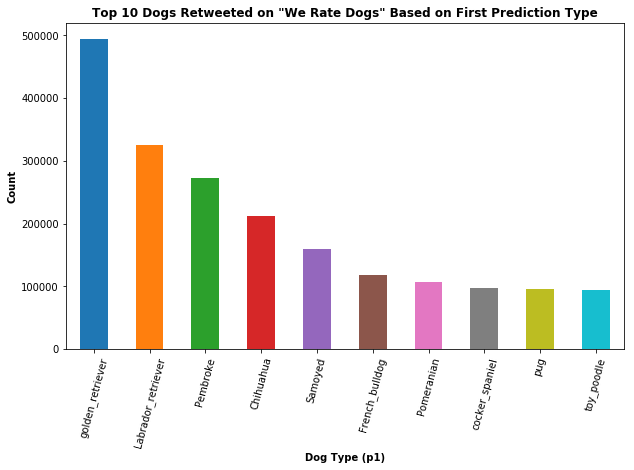

In [84]:
#Fig size
plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2

df.groupby('p1').retweet_count.sum().nlargest(10).plot(kind='bar')

# Add xticks on the middle of the group bars
plt.xlabel('Dog Type (p1)', fontweight='bold')
plt.xticks(rotation=75)
plt.ylabel('Count', fontweight='bold')
plt.title('Top 10 Dogs Retweeted on "We Rate Dogs" Based on First Prediction Type', fontweight='bold') 

# Create legend & Show graphic
plt.show()

**INSIGHT #5:** Golden Retrievers are the most retweeted dogs on "We Rate Dogs," followed by Labrador Retrievers and Pembrokes.

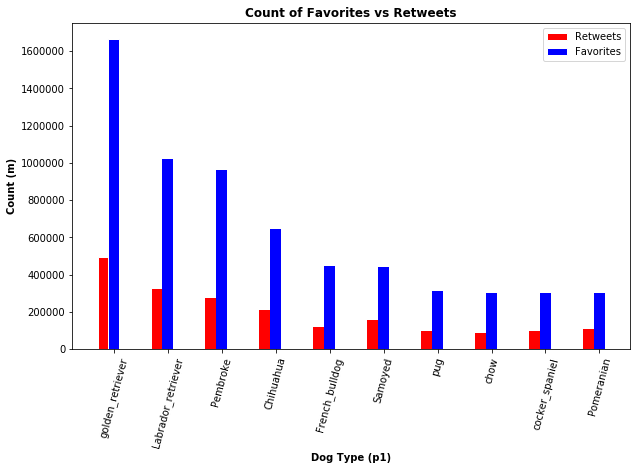

In [85]:
#import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
 
# set width of bar
barWidth = 0.2
 
# set height of bar
bars1 = [494931, 325520, 272440, 212291, 117874, 158909, 96539, 87298, 97138, 106518]
bars2 = [1668261, 1020595, 960900, 644051, 447417, 439678, 311540, 301552, 299498, 299114]


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='r', width=barWidth, edgecolor='white', label='Retweets')
plt.bar(r2, bars2, color='b', width=barWidth, edgecolor='white', label='Favorites')

 
# Add xticks on the middle of the group bars
plt.xlabel('Dog Type (p1)', fontweight='bold')
plt.ylabel('Count (m)', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(retweet))], ['golden_retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua', 'French_bulldog', 'Samoyed', 'pug', 'chow', 'cocker_spaniel', 'Pomeranian'], rotation=75)
plt.title('Count of Favorites vs Retweets', fontweight='bold') 
    
# Create legend & Show graphic
plt.legend()
plt.show()


**INSIGHT #6:** Users of the "We Rate Dogs" Twitter site are much more likely to favorite a dog than to retweet it across all dog types. That said, the top 3 dog types favorited are the same top 3 dog types that are retweeted.